# Search and Load CMIP6 Projections in Omo

Start by loading necessary packages.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs

xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [2]:
plt.rcParams['figure.figsize'] = 12, 6

## Load precipitation data

Function to load precipitation data from a dataframe of projections for a given experiment id. 

In [3]:
def load_pr_data(pr_df, expt_id):
    """
    Load precipitation data for given experiment ID and dataframe of projections.
    """
    uri = df_pr[(df_pr.experiment_id == expt_id)].zstore.values[0]
    gcs = gcsfs.GCSFileSystem(token='anon')
    ds = xr.open_zarr(gcs.get_mapper(uri), consolidated=True)
    return ds

Start with the following:

* **CMCC-CM2-SR5:** much wetter future with increasing precipitation from historical to mid-century to late-century. 
* **MIROC-ES2L:** slightly wetter but with some extreme dry years.
* **IITM-ESM:** much drier future with decreasing precipitation from historical to mid-century to late-century. 
* **CNRM-ESM2-1:** slightly drier 
* **NESM3:** futures are  a mix of wetter and drier from the baseline depending on the scenario and timeframe. 
* **NorESM2-LM:** wetter and drier depending on scenario & timeframe, with more extreme wet/dry years

Load zarr store of CMIP6 projections from google store and query for the projections above.

In [4]:
# load zarr store to df
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


5
hist
5
hist
5
hist
9
hist
4
hist
6
hist


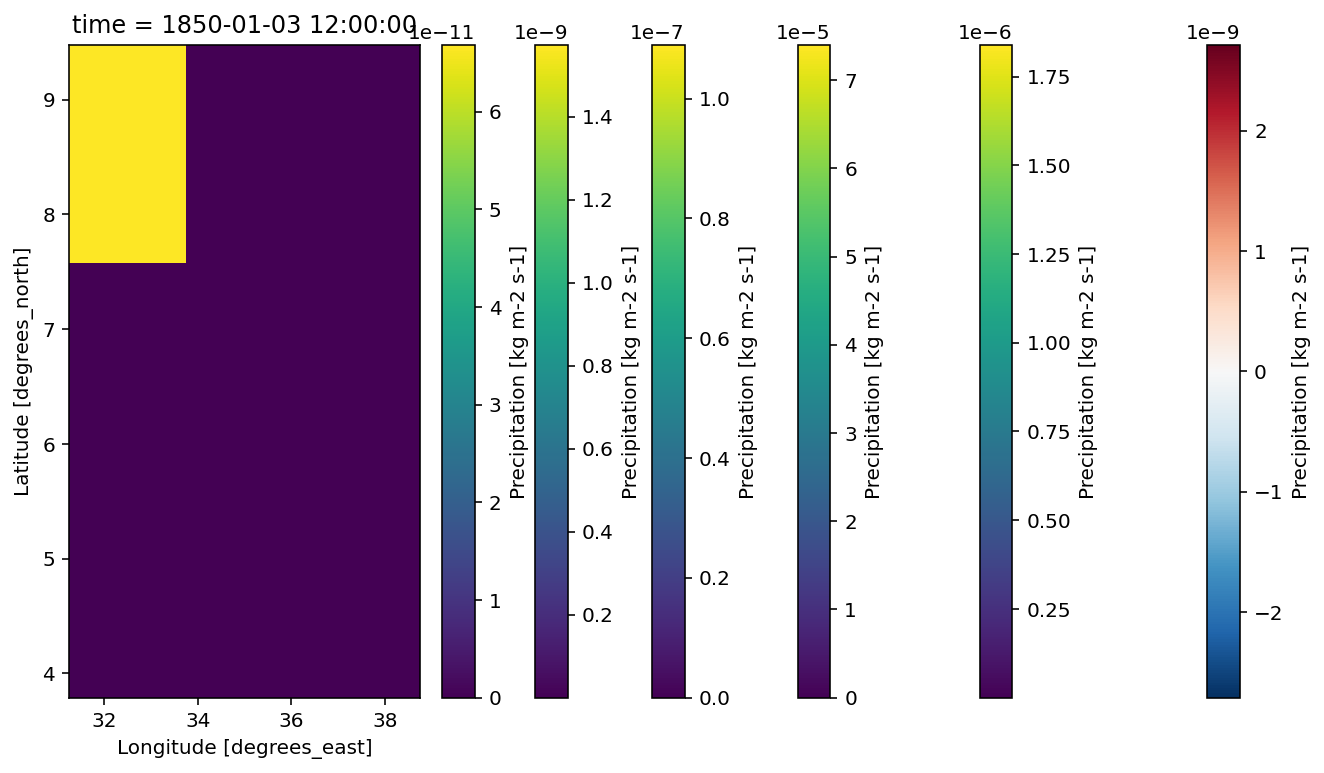

In [5]:
for item in ["CMCC-CM2-SR5", "MIROC-ES2L", "IITM-ESM", "CNRM-ESM2-1", "NESM3", "NorESM2-LM"]:
#     pr = esgf_search(activity_id='CMIP', table_id='day',
#                      variable_id='pr', experiment_id='historical',
#                      source_id=,
#                      member_id="r10i1p1f1")
    
    
    # select single ensemble for each projection 
    df_pr = df[(df.table_id == 'day') & (df.variable_id == 'pr') & (df.source_id == item)]
    if (item == "MIROC-ES2L") | (item == "CNRM-ESM2-1"):
        df_pr = df_pr[df_pr.member_id == 'r1i1p1f2']
    if (item == "NESM3") | (item == "NorESM2-LM"):
        df_pr = df_pr[df_pr.member_id == 'r1i1p1f1']
    print(len(df_pr.experiment_id))
    
    # 
    hist = load_pr_data(df_pr, 'historical') # sel(lat=slice(4, 10)).sel(lon=slice(33,39)).load()
    ssp126 = load_pr_data(df_pr, 'ssp126')# .sel(lat=slice(4, 10)).sel(lon=slice(33,39)).load()
    ssp245 = load_pr_data(df_pr, 'ssp245') #.sel(lat=slice(4, 10)).sel(lon=slice(33,39)).load()
    ssp585 = load_pr_data(df_pr, 'ssp585') # .sel(lat=slice(4, 10)).sel(lon=slice(33,39)).load()
    if len(df_pr[df_pr.experiment_id == 'ssp370'].member_id) > 0:
        ssp370 = load_pr_data(df_pr, 'ssp370') # .sel(lat=slice(4, 10)).sel(lon=slice(33,39)).load()
    
    hist.pr.isel(time=2).sel(lat=slice(4, 10)).sel(lon=slice(32,39)).plot()


NameError: name 'sel' is not defined

In [12]:
import geopandas 
from shapely.geometry import mapping 
omo = geopandas.read_file('omo/subs1.shp', crs="epsg:32637")
omo.crs = {'init' :"epsg:32637"}
omo = omo.to_crs({'init': 'epsg:4326'})
# omo = omo.to_crs("EPSG:4326")
plt.figure(figsize=(16,8))
ax = plt.axes()
hist.pr.isel(time=150).sel(lat=slice(4, 10)).sel(lon=slice(32,39)).plot(ax=ax)
omo.plot(ax = ax, alpha = 0.8, facecolor = 'none', lw = 1)

ModuleNotFoundError: No module named 'shapely'

In [10]:
ssp245.sel(lat=slice(4, 10)).sel(lon=slice(32,39))

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 3, lon: 3, time: 31390)
Coordinates:
  * lat        (lat) float64 4.737 6.632 8.526
    lat_bnds   (lat, bnds) float64 ...
  * lon        (lon) float64 32.5 35.0 37.5
    lon_bnds   (lon, bnds) float64 ...
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
    time_bnds  (time, bnds) object ...
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 ...
Attributes:
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               ScenarioMIP
    branch_method:             Hybrid-restart from year 2015-01-01 of historical
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     60225.0
    cmor_version:              3.5.0
    contact:                   Please send any requests or bug reports to nor...
    creation_date:             2019-12-30T11:12:30Z
    data_specs_version:        01.00.31
    experiment:                update of RCP4.5 based on SSP2
    experiment_id:             ssp245
    external_variables:        areacella
    forcing_index:             1
    frequency:                 day
    further_info_url:          https://furtherinfo.es-doc.org/CMIP6.NCC.NorES...
    grid:                      finite-volume grid with 1.9x2.5 degree lat/lon...
    grid_label:                gn
    history:                   2019-12-30T11:12:30Z ; CMOR rewrote data to be...
    initialization_index:      1
    institution:               NorESM Climate modeling Consortium consisting ...
    institution_id:            NCC
    license:                   CMIP6 model data produced by NCC is licensed u...
    mip_era:                   CMIP6
    model_id:                  NorESM2-LM
    nominal_resolution:        250 km
    parent_activity_id:        CMIP
    parent_experiment_id:      historical
    parent_mip_era:            CMIP6
    parent_source_id:          NorESM2-LM
    parent_sub_experiment_id:  none
    parent_time_units:         days since 1850-01-01
    parent_variant_label:      r1i1p1f1
    physics_index:             1
    product:                   model-output
    realization_index:         1
    realm:                     atmos
    run_variant:               N/A
    source:                    NorESM2-LM (2017): \naerosol: OsloAero\natmos:...
    source_id:                 NorESM2-LM
    source_type:               AOGCM AER BGC
    status:                    2020-06-24;created; by gcs.cmip6.ldeo@gmail.com
    sub_experiment:            none
    sub_experiment_id:         none
    table_id:                  day
    table_info:                Creation Date:(24 July 2019) MD5:0bb394a356ef9...
    title:                     NorESM2-LM output prepared for CMIP6
    tracking_id:               hdl:21.14100/031d86ee-6584-49a8-9040-4afdf11ed...
    variable_id:               pr
    variant_label:             r1i1p1f1